***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [43]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.stats import norm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style('white')
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Load the Data, set index and info about data</b>
</div>

In [44]:
df = pd.read_csv('POPTHM.csv')
df.rename(columns = {'POPTHM': 'value', 'DATE': 'date'}, inplace = True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 733 entries, 1959-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   733 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


<div class="alert alert-block alert-info">
<b>Plot original time series</b>
</div>

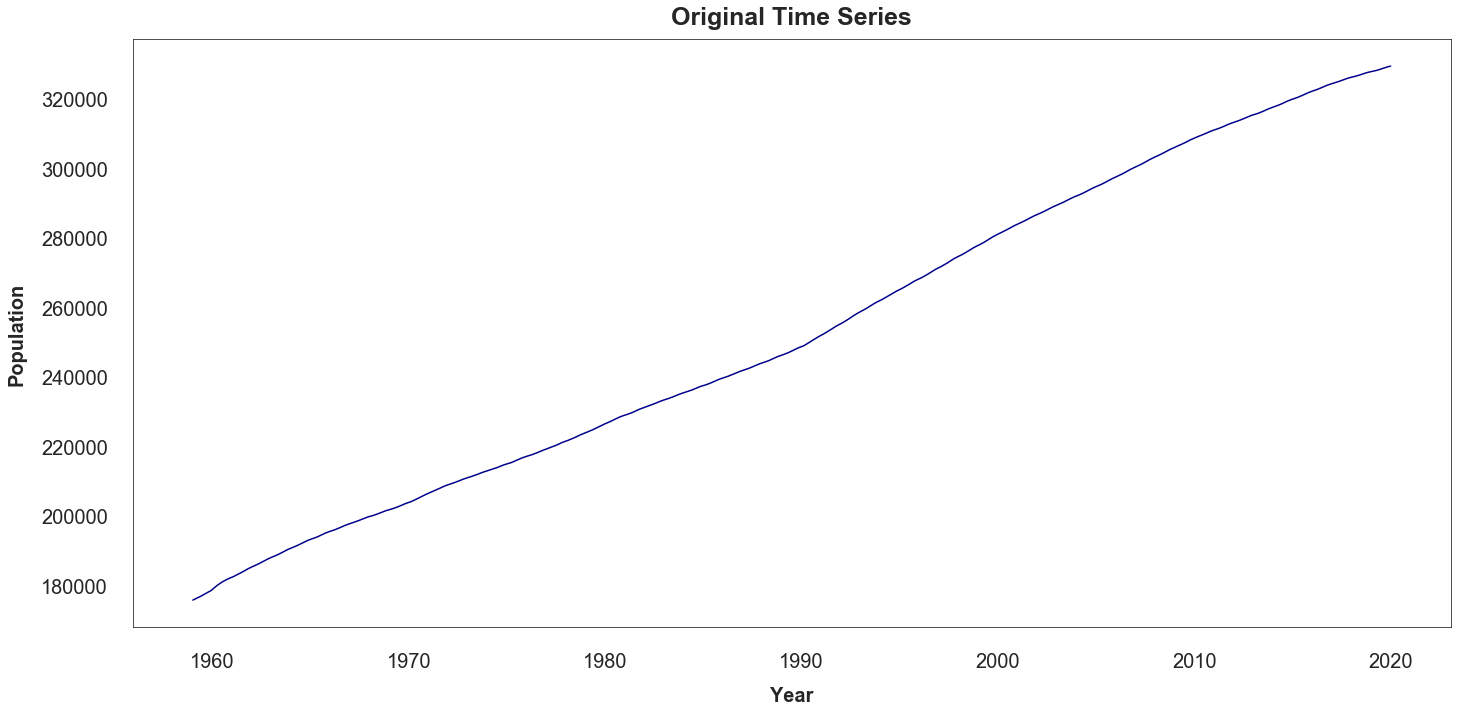

In [45]:
plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal')
plt.title('Original Time Series', weight = 'bold', fontsize = 25, pad = 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)                                
plt.tight_layout()                                               
plt.rc('font', size = 15)
plt.plot(df.index, df['value'], color = 'darkblue')
plt.show()

<div class="alert alert-block alert-info">
<b>Pick a year to plot</b>
</div>

Type the year you want to plot from 1959 to 2019: 2010


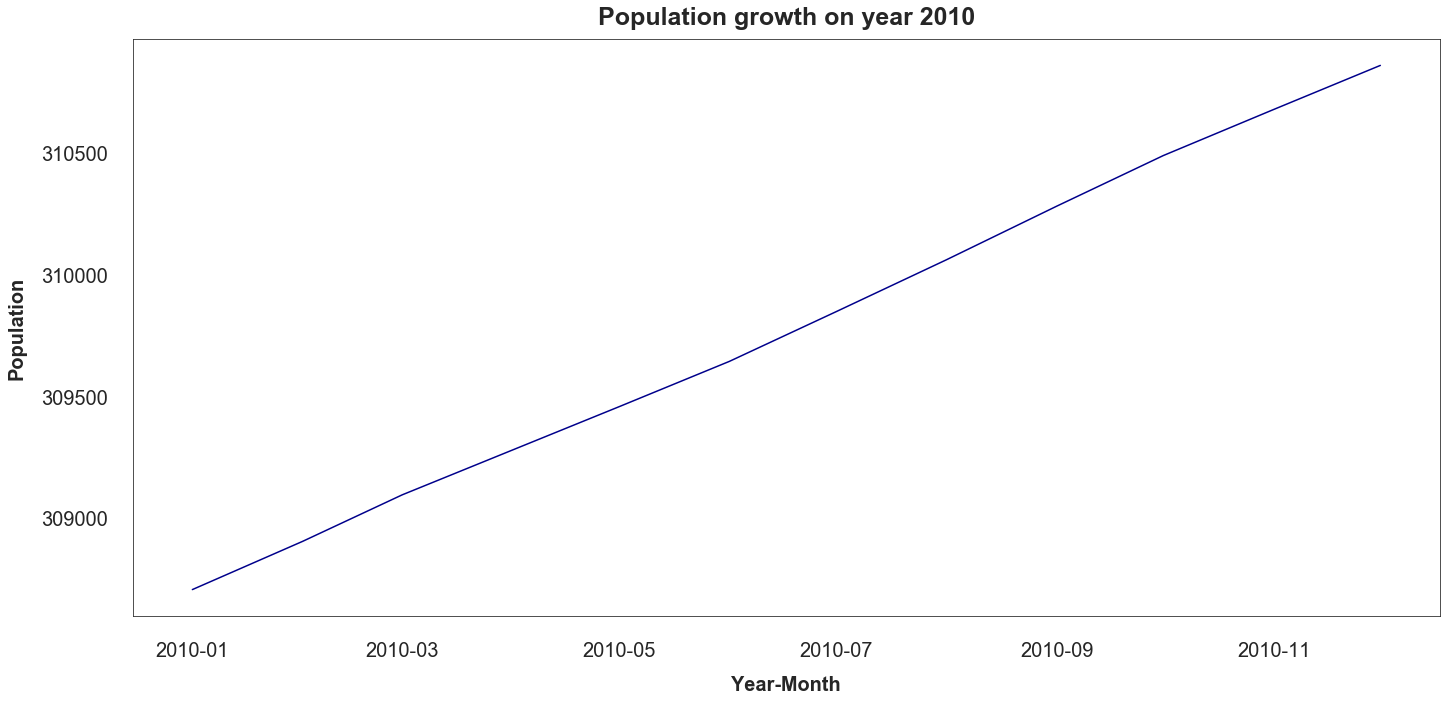

In [46]:
year = int(input('Type the year you want to plot from 1959 to 2019: '))
if year > 1958 and year < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth on year %.0f' % year, weight = 'bold', fontsize = 25, pad = 15)
    plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 15, size = 10)                                
    plt.tight_layout()                                               
    plt.rc('font', size = 15)                                                                                      
    dfyear1 = df[df.index.year == year]
    plt.plot(dfyear1, color = 'darkblue')
    plt.show()
else:
    print('Run again and type a valid year')

<div class="alert alert-block alert-info">
<b>Pick multiple years to plot</b>
</div>

Type the year you wanna start from 1959 to 2018: 2015
Type the year you wanna stop from 1960 to 2019: 2019


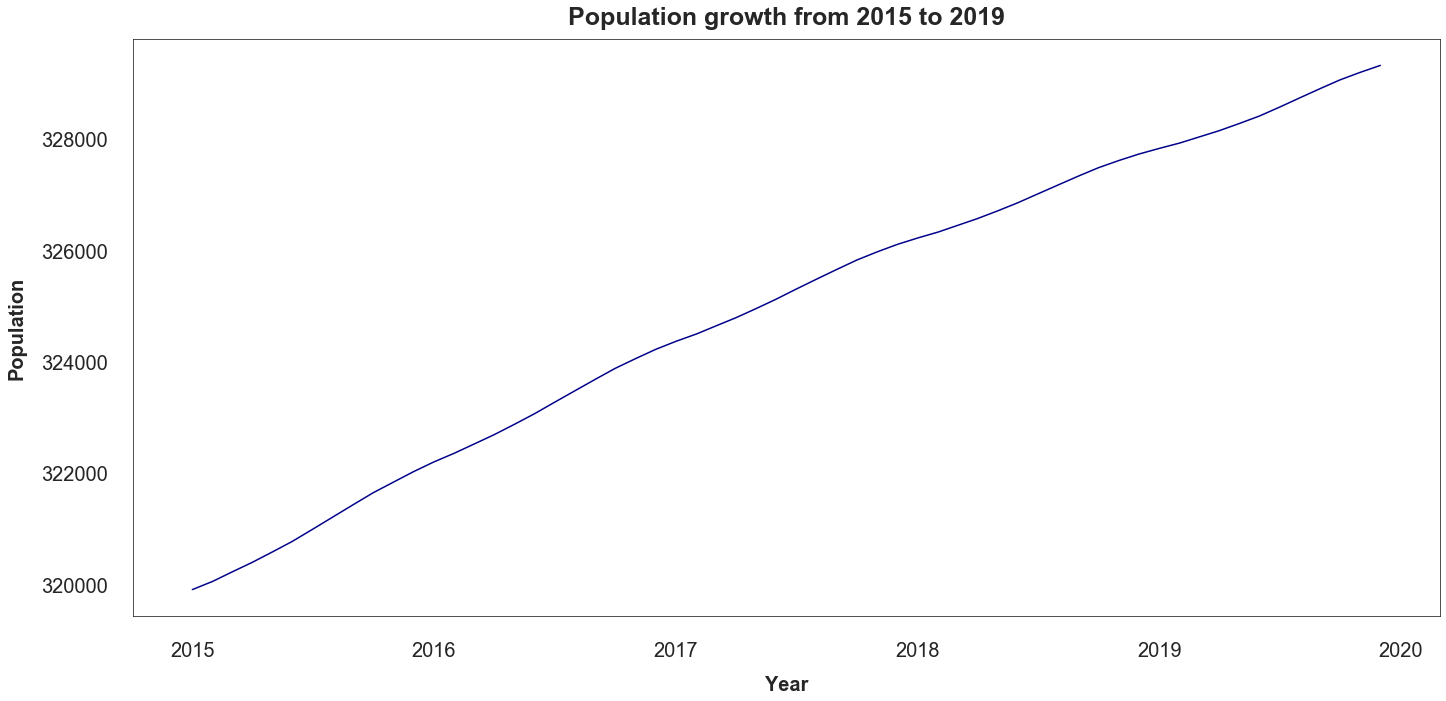

In [47]:
year_s = int(input('Type the year you wanna start from 1959 to 2018: '))
year_p = int(input('Type the year you wanna stop from 1960 to 2019: '))
if year_s > 1958 and year_s < year_p and year_p > year_s and year_p < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth from %.0f to %.0d' % (year_s, year_p), weight = 'bold', fontsize = 25, pad = 15)
    plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 15, size = 10)                                  
    plt.tight_layout()                                               
    plt.rc('font', size = 15)
    dfyear2 = df[(df.index.year >= year_s) & (df.index.year <= year_p)]
    plt.plot(dfyear2, color = 'darkblue')
    plt.show()
else:
    print('Run again and type a valid year(s)')

<div class="alert alert-block alert-info">
<b>Create percentage change time series</b>
</div>

In [48]:
#####################################################################################
#                                                                                   #
#  Use this to get first difference -> diff = df['value'].diff()                    #
#                                                    or                             #
#                                     diff =(df['value']-df['value'].shift())       #
#                                                                                   #
#  Use this to get percentage change use -> pct = diff/df['value']                  #
#                                                                                   #
#                                                    or                             #
#                                                                                   #
#                                          pct = df['value'].pct_change()           #
#                                                                                   #
#  Use this to get only numerical value -> ._get_numeric_data()                     #                                     
#  Use this to get only assign value inside a column or row -> .dropna()            #
#                                                                                   #
#####################################################################################

pct = df['value'].pct_change() 
pct_fix = pct._get_numeric_data().dropna()

<div class="alert alert-block alert-info">
<b>Normal distribution of percentage change</b>
</div>

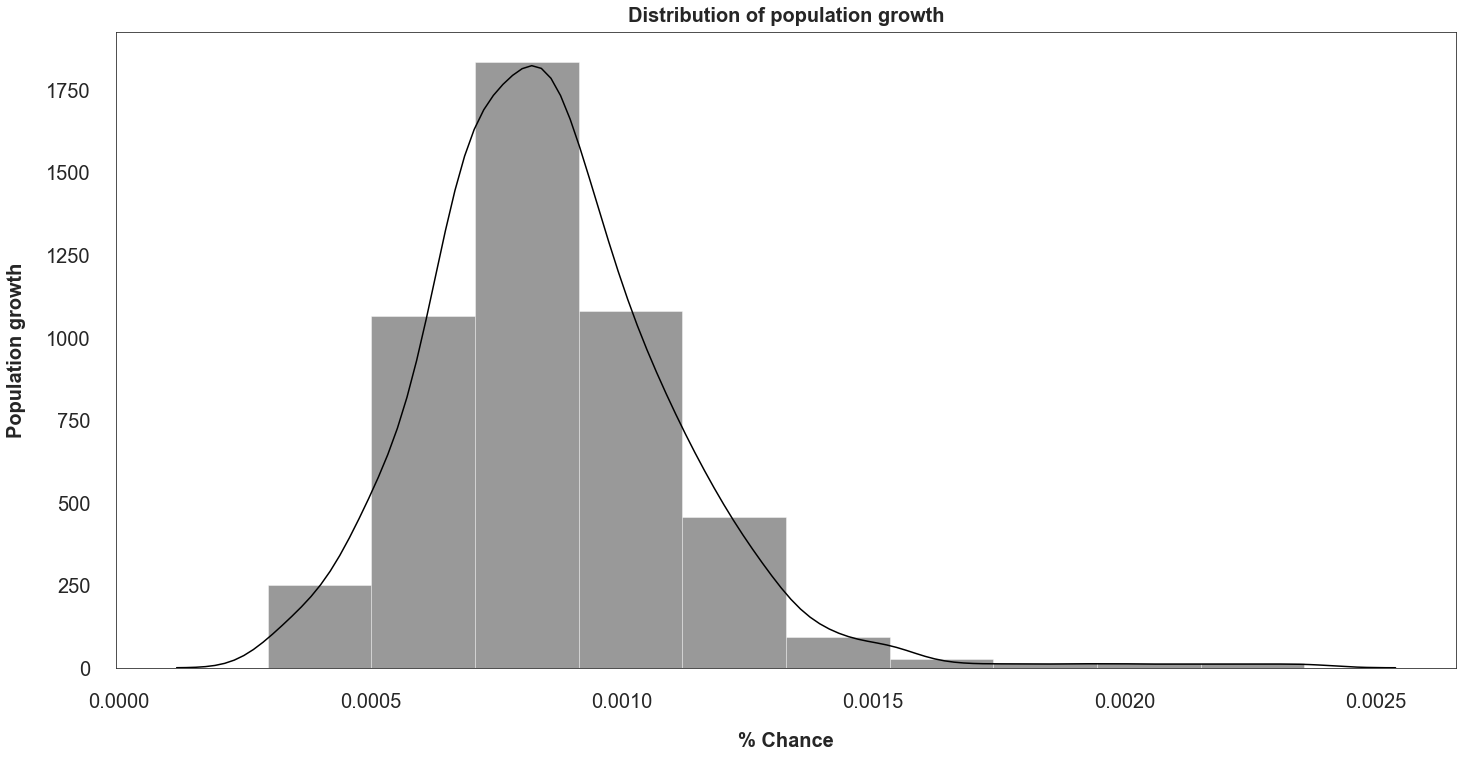

In [49]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)
ax = sns.distplot(pct_fix, bins = 10, color = 'black', kde = True, hist = True)
ax.set_title('Distribution of population growth', weight = 'bold', fontsize = 20, pad = 10)
ax.set_xlabel('% Chance', weight = 'bold', fontsize = 20, labelpad = 20)
ax.set_ylabel('Population growth', weight = 'bold', fontsize = 20, labelpad = 20)
ax.tick_params(labelsize = 20, length = 10)
start, end = plt.ylim()
plt.yticks(np.arange(start, end, 250))
plt.show()

<div class="alert alert-block alert-info">
<b>Check if the time series of original and percentage change values are stationary</b>
</div>

In [50]:
result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Original Time Series is Non-Stationary')

ADF Statistic: 0.185761
p-value: 0.971452
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - Original Time Series is Non-Stationary


In [51]:
result = adfuller(pct_fix)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Percentage change Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Percentage change Time Series is Non-Stationary')

ADF Statistic: -3.523377
p-value: 0.007407
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Reject Ho - Percentage change Time Series is Stationary


<div class="alert alert-block alert-info">
<b>Data results summary</b>
</div>

In [52]:
Y = pct_fix[~np.isnan(pct_fix.values)]
ts_values_orig = df['value'].values
ts_values = ts_values_orig[:-1]
X = sm.add_constant(ts_values)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     463.8
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           5.07e-80
Time:                        19:54:42   Log-Likelihood:                 5208.3
No. Observations:                 732   AIC:                        -1.041e+04
Df Residuals:                     730   BIC:                        -1.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017   4.12e-05     42.017      0.0

<div class="alert alert-block alert-info">
<b>Decomposition of percentage change time series</b>
</div>

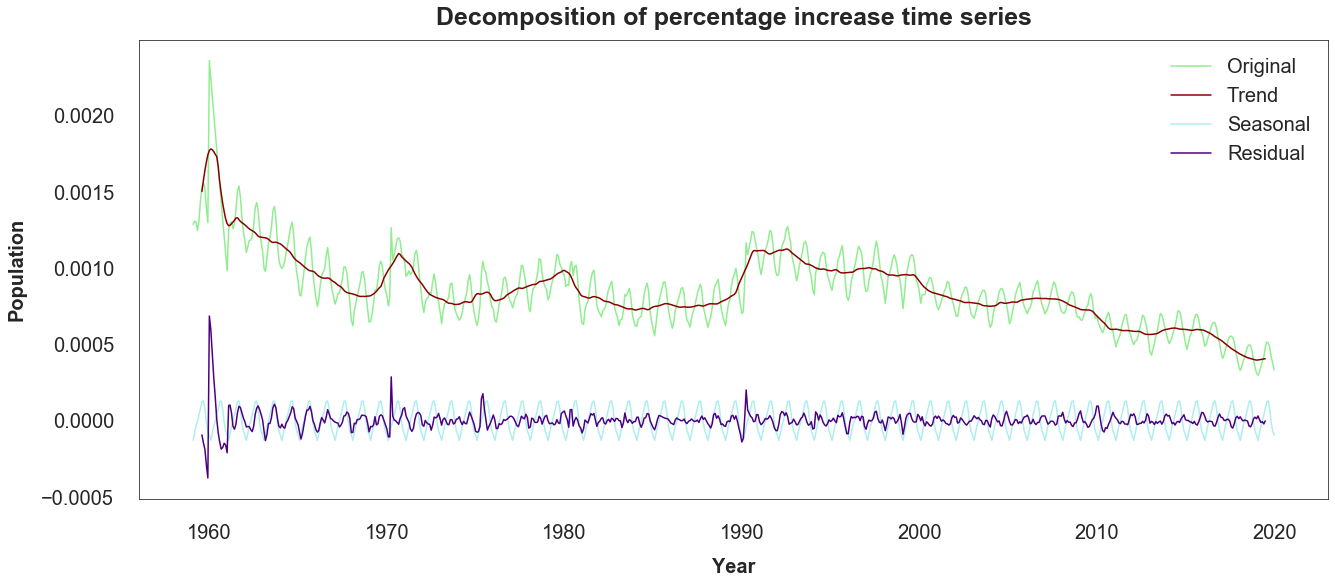

In [53]:
# Decomposition of first difference time series
decomposition = seasonal_decompose(pct_fix)
# Trend of first difference time series
trend = decomposition.trend
# Seasonal of first difference time series
seasonal = decomposition.seasonal
# Residual of first difference time series
residual = decomposition.resid

plt.figure(figsize = (20,10))
plt.title('Decomposition of percentage increase time series', weight = 'bold', fontsize = 25, pad = 15)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.rc('font', weight = 'normal')
plt.plot(pct_fix, label = 'Original', color = 'lightgreen')
plt.plot(trend, label = 'Trend', color = 'darkred')
plt.plot(seasonal, label = 'Seasonal', color = 'paleturquoise')
plt.plot(residual, label = 'Residual', color = 'indigo')
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Plotting Autocorrelation and Parial Autocorrelation of original and percentage change time series</b>
</div>

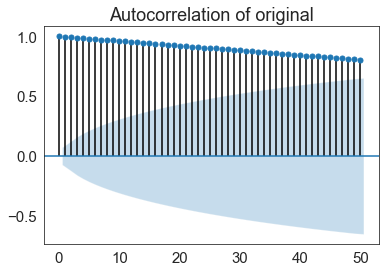

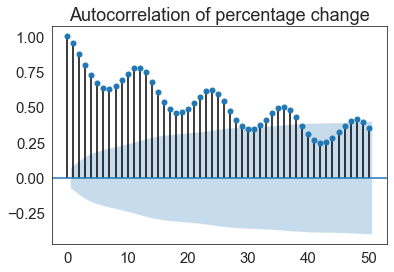

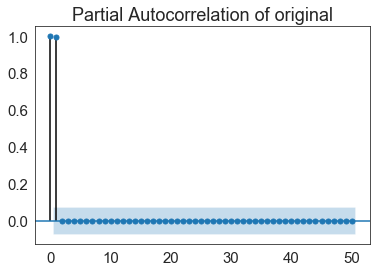

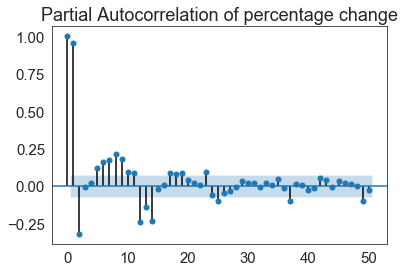

In [54]:
acf = plot_acf(df['value'],  title = 'Autocorrelation of original', lags = 50)
acf_diff = plot_acf(pct_fix, title = 'Autocorrelation of percentage change', lags = 50)

pacf = plot_pacf(df['value'],  title = 'Partial Autocorrelation of original', lags = 50)
pacf_diff = plot_pacf(pct_fix,  title = 'Partial Autocorrelation of percentage change', lags = 50)

<div class="alert alert-block alert-info">
<b>Create train and test data split</b>
</div>

In [55]:
########################################
#                                      #
#  Split Train = 80% and Test = 20%    #
#                                      #
#  train = df.loc['1959-01':'2005-12'] #
#  test = df.loc['2006-01':]           # 
#                                      #
#             or                       #   
#                                      # 
#  train = df['value'][0:586]          #
#  test  = df['value'][587:]           # 
########################################

train = pct_fix[0:586]           
test  = pct_fix[587:]  

<div class="alert alert-block alert-info">
<b>Building the ARMA model and show model results</b>
</div>

In [56]:
#############################################
#                                           #
#  P = Auto regressive feature of the model #
#                                           #
#  D = Differencing order                   #
#                                           #
#  Q = Moving average feature of the model  #
#                                           #
#############################################

#Arima model
model = ARIMA(train.values, order = (2, 0, 1))
model_fit = model.fit()

#Fitted line
prediction = model_fit.predict()

#Forecasted values array
forecast = model_fit.forecast(11)[0]

#Confidence intervals array - Can't make to 1d array
conf = model_fit.forecast(11)[2]
lower_conf = np.hsplit(model_fit.forecast(11)[2], 2)[0].reshape(11,1)
upper_conf = np.hsplit(model_fit.forecast(11)[2], 2)[1].reshape(11,1)

#Show Arima Results
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  586
Model:                     ARMA(2, 1)   Log Likelihood                4737.533
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 28 Apr 2020   AIC                          -9465.066
Time:                        19:54:44   BIC                          -9443.200
Sample:                             0   HQIC                         -9456.545
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009   3.55e-05     26.177      0.000       0.001       0.001
ar.L1.y        1.2741      0.114     11.159      0.000       1.050       1.498
ar.L2.y       -0.3573      0.108     -3.316      0.0

<div class="alert alert-block alert-info">
<b>Plot original and fitted line and see mean squared error</b>
</div>

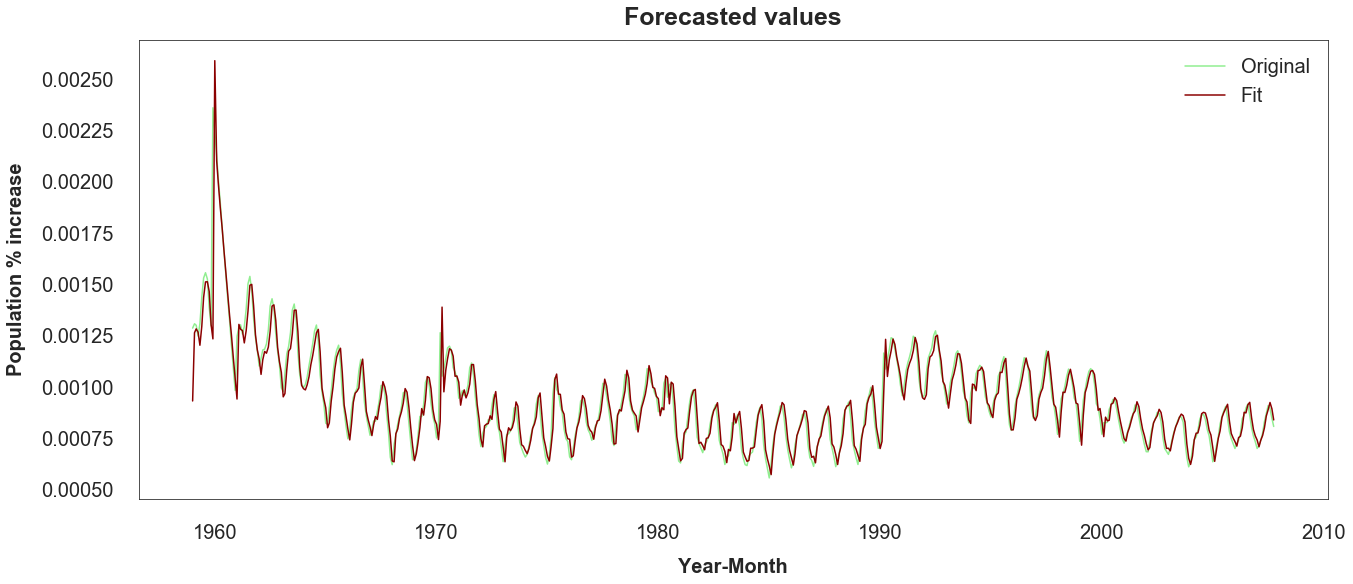

Mean squared error of original and fitted lines is: 0.000000005734


In [57]:
plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 25, pad = 15)
plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population % increase', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.rc('font', weight = 'normal')
date = pd.date_range(start = '2020-01', end = '2020-12', freq = 'M')
plt.plot(df.index[0:586], train, label = 'Original', color = 'lightgreen')
plt.plot(df.index[0:586], prediction, label = 'Fit', color = 'darkred')
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.show()

mse = mean_squared_error(train, prediction) 
print('Mean squared error of original and fitted lines is: %.12f' % mse)

<div class="alert alert-block alert-info">
<b>Create period for forecast and new data frame for percentage change</b>
</div>

In [58]:
period = pd.period_range(start = '2020-02-01', end = '2020-12-01', freq = 'M')
date = period.astype('datetime64[ns]') 

df1 = pd.DataFrame(pct_fix, df.index[1:])
df2 = pd.DataFrame(forecast, date, columns = ['value'])
df3 = df1.append(df2)
df3.index.name = 'date'
df3

,value
date,
1959-02-01,0.001285
1959-03-01,0.001306
1959-04-01,0.001299
1959-05-01,0.001246
1959-06-01,0.001307
...,...
2020-08-01,0.000872
2020-09-01,0.000880
2020-10-01,0.000888


<div class="alert alert-block alert-info">
<b>Plot forecasted values</b>
</div>

Forecasted date was: DatetimeIndex(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

Forecasted values for next 11 months is: [0.00080316 0.00081261 0.00082579 0.00083921 0.0008516  0.00086259
 0.00087216 0.00088044 0.00088756 0.00089368 0.00089893]


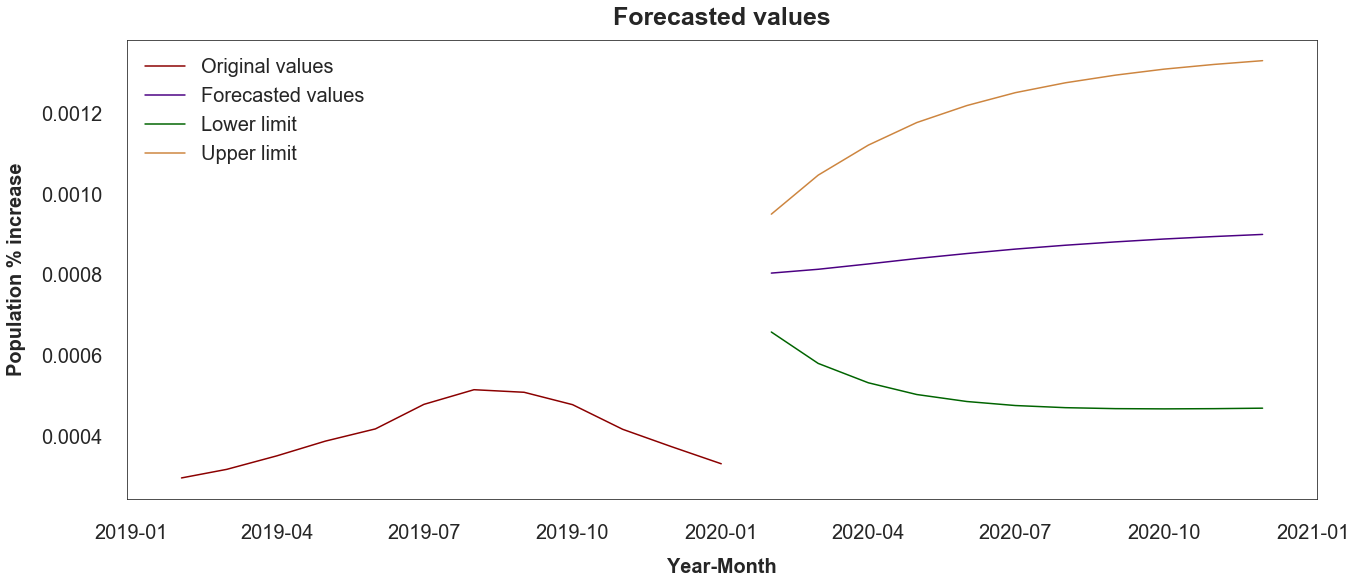

In [59]:
print('Forecasted date was: %s' % date)
print('')
print('Forecasted values for next 11 months is: %s' % forecast)

plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 25, pad = 15)
plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Population % increase', weight = 'bold', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)                                  
plt.tight_layout(pad = 5)                                               
plt.rc('font', size = 15)
plt.rc('font', weight = 'normal')
plt.plot(df3.index[720:732], df3.value[720:732],label = 'Original values', color = 'darkred')
plt.plot(df3.index[732:], df3.value[732:],label = 'Forecasted values', color = 'indigo')
plt.plot(df3.index[732:], lower_conf, label = 'Lower limit', color = 'darkgreen')
plt.plot(df3.index[732:], upper_conf, label = 'Upper limit', color = 'peru')
plt.legend(loc = 'upper left', prop = {'size':20}, frameon = False)
plt.show()